In [205]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [206]:
# Camera Settings:
"""
frame width: 640.0
frame height: 480.0
--------------------------------
brightness: 128.0
contrast: 32.0
saturation: 32.0
--------------------------------
gain: 0.0
exposure: -6.0
--------------------------------
white balance: 1.0

Höhe: 30.26cm
"""

'\nframe width: 640.0\nframe height: 480.0\n--------------------------------\nbrightness: 128.0\ncontrast: 32.0\nsaturation: 32.0\n--------------------------------\ngain: 0.0\nexposure: -6.0\n--------------------------------\nwhite balance: 1.0\n\nHöhe: 30.26cm\n'

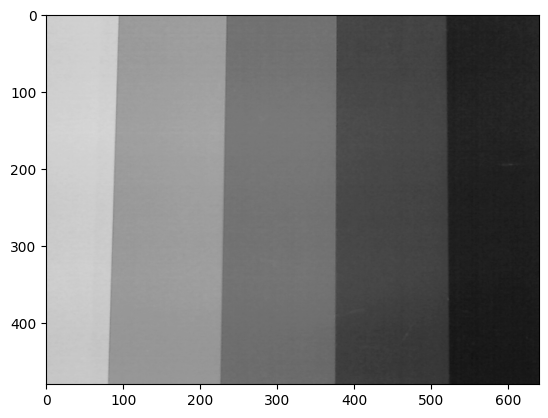

In [207]:
image = cv2.imread('./Versuch2Daten/Aufgabe1/file.png', cv2.IMREAD_GRAYSCALE)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()


In [208]:
white_part = image_rgb[:, :80]
light_gray_part = image_rgb[:, 100:210]
gray_part = image_rgb[:, 240:370]
dark_gray_part = image_rgb[:, 390:510]
black_part = image_rgb[:, 530:]
image_parts = [white_part, light_gray_part, gray_part, dark_gray_part, black_part]


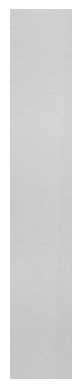

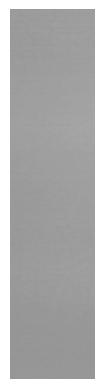

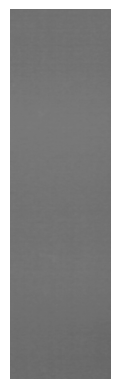

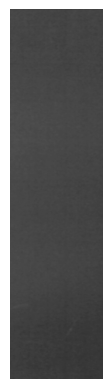

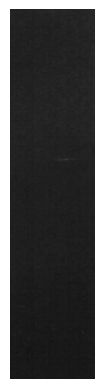

In [209]:
for x in image_parts:
    plt.imshow(x)
    plt.axis('off')
    plt.show()

In [210]:
part_means = []
part_s = []
for x in image_parts:
    part_means.append(np.mean(np.array(x)))
    part_s.append(np.std(np.array(x)))
part_means = np.array(part_means)
part_s = np.array(part_s)

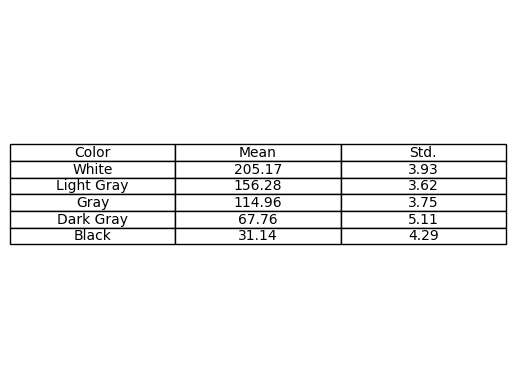

In [211]:
left_labels = ['White', 'Light Gray', 'Gray', 'Dark Gray', 'Black']

table_data = list(zip(left_labels, np.round(part_means, 2), np.round(part_s, 2)))
column_labels = ['Mean', 'Std.']

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')

# Add table to the plot with the left labels
ax.table(cellText=table_data, colLabels=['Color'] + column_labels, cellLoc='center', loc='center')

# Show the plot
plt.show()

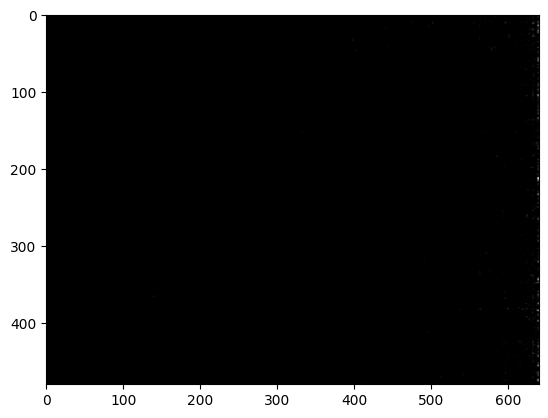

True

In [212]:
# Aufgabe 2

images = []
for i in range(1,11):
    images.append(cv2.imread(f"./Versuch2Daten/Aufgabe2/file{i}.png", cv2.IMREAD_GRAYSCALE))

"""
for x in images:
    plt.imshow(x)
    plt.show()
"""
dark_img = np.round(np.sum(images, axis=0) / 10., 0).astype(np.uint8)
contrast_dark_img = np.round((np.sum(images, axis=0) / 10.)  * 50, 0).astype(int)
plt.imshow(contrast_dark_img, cmap='gray')
plt.show()
cv2.imwrite('dark_img.png', dark_img)

In [213]:
def subtract_dark_img(input_img):
    return input_img - dark_img


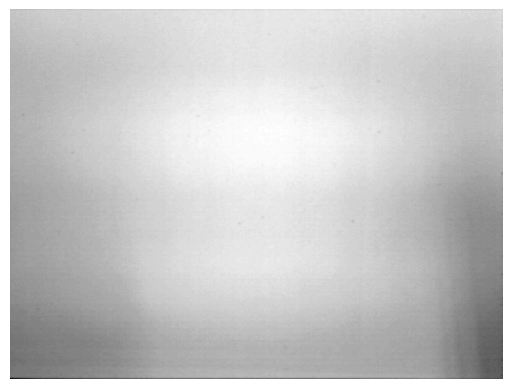

In [214]:
# Aufgabe 3

images = []
for i in range(10):
    images.append(cv2.imread(f"./Versuch2Daten/Aufgabe3/file{i}.png", cv2.IMREAD_GRAYSCALE))


white_img = np.round(np.sum(images, axis=0) / 10., 0).astype(np.uint8) - dark_img

plt.imshow(white_img, cmap='gray')
plt.axis('off')
plt.show()



In [215]:
# Korrigierter Pixelwert = (Pixelwert im Originalbild) / (Pixelwert im Weißbild) * Normierungsfaktor

def bild_korrektur(input_img):
    korrektur1 = subtract_dark_img(input_img)
    korrektur2 = korrektur1.astype(np.float64) / white_img.astype(np.float64)
    norm = np.full((480, 640), np.max(white_img), dtype=np.float64)
    korrektur2 = korrektur2 * norm
    return korrektur2.astype(np.uint8)


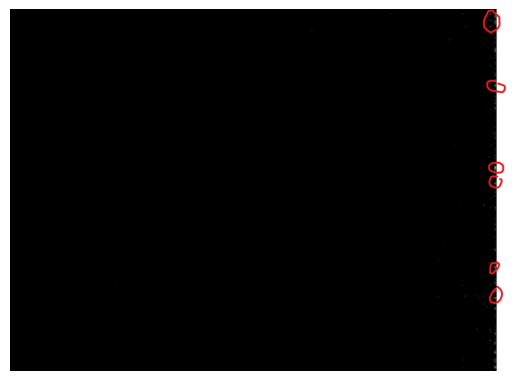

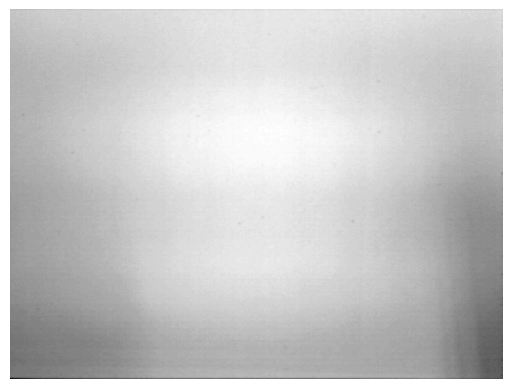

In [216]:
# Aufgabe 4

marked = cv2.imread('./Versuch2Daten/Aufgabe4/markierte_pixel.png')
marked_rgb = cv2.cvtColor(marked, cv2.COLOR_BGR2RGB)

plt.imshow(marked_rgb)
plt.axis('off')
plt.show()
plt.imshow(white_img, cmap='gray')
plt.axis('off')
plt.show()


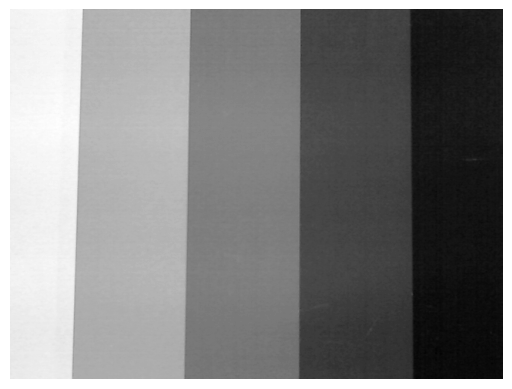

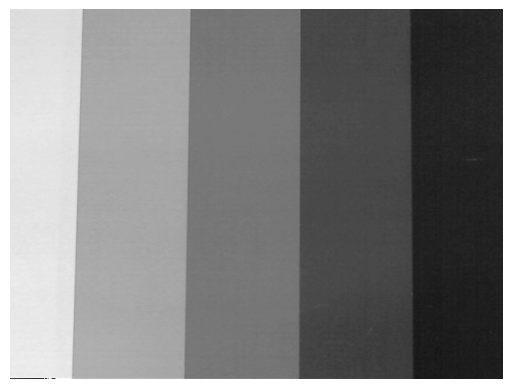

In [217]:
correct_img = bild_korrektur(image)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(correct_img, cmap='gray')
plt.axis('off')
plt.show()

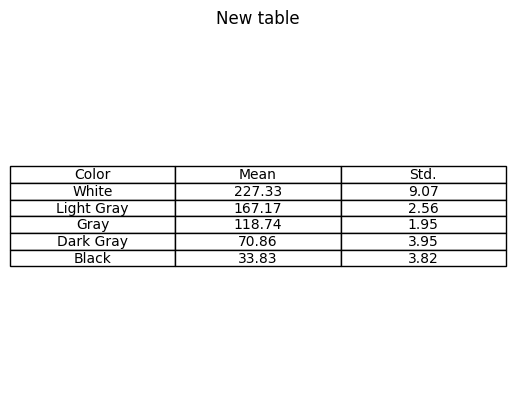

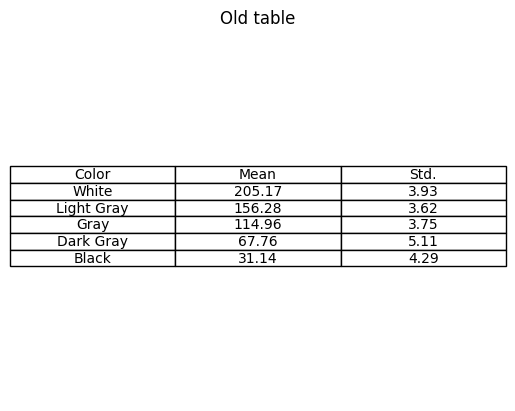

In [218]:

white_img2 = correct_img[:, :80]
light_gray_img2 = correct_img[:, 100:210]
gray_img2 = correct_img[:, 240:370]
dark_gray_img2 = correct_img[:, 390:510]
black_img2 = correct_img[:, 530:]
image_parts2 = [white_img2, light_gray_img2, gray_img2, dark_gray_img2, black_img2]
part_means2 = []
part_s2 = []
for x in image_parts2:
    part_means2.append(np.mean(np.array(x)))
    part_s2.append(np.std(np.array(x)))
part_means2 = np.array(part_means2)
part_s2 = np.array(part_s2)

left_labels2 = ['White', 'Light Gray', 'Gray', 'Dark Gray', 'Black']

table_data2 = list(zip(left_labels2, np.round(part_means2, 2), np.round(part_s2, 2)))
column_labels2 = ['Mean', 'Std.']

fig2, ax2 = plt.subplots()
ax2.axis('tight')
ax2.axis('off')

ax2.table(cellText=table_data2, colLabels=['Color'] + column_labels2, cellLoc='center', loc='center')


plt.title("New table")
plt.show()

left_labels = ['White', 'Light Gray', 'Gray', 'Dark Gray', 'Black']

table_data = list(zip(left_labels, np.round(part_means, 2), np.round(part_s, 2)))
column_labels = ['Mean', 'Std.']

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')

ax.table(cellText=table_data, colLabels=['Color'] + column_labels, cellLoc='center', loc='center')
plt.title("Old table")
plt.show()